## Лекция 1. Основы обучения нейронных сетей

## Метод градиентного спуска

Идея метода довольно проста. Предположим, имеется дифференцируемая функция image.png с точкой экстремума x *. Нам нужно найти эту точку. Для простоты восприятия информации, предположим, что это парабола с точкой экстремума x *. Конечно, для такого простого случая эту точку можно очень легко определить из уравнения:

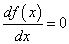

но она используется лишь для визуализации метода градиентного спуска. В действительности функции могут быть гораздо сложнее и зависеть от произвольного числа аргументов.. Или же, функция постоянно меняется и нам необходимо под нее подстраиваться для определения текущего положения точки минимума. Все эти задачи удобнее решать с позиции алгоритмов направленного поиска, например, градиентного спуска.

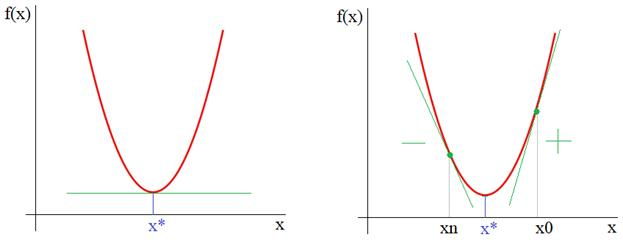

Итак, из рисунка мы хорошо видим, что справа от точки экстремума x * производная положительна, а слева – отрицательна. И это общее математическое правило для точек локального минимума. Предположим, что мы выбираем произвольную начальную точку image.png на оси абсцисс. Теперь, смотрите, чтобы из image.png двигаться в сторону x *, нам нужно в области положительных производных ее уменьшать, а в области отрицательных – увеличивать. Математически это можно записать так:

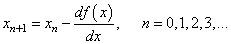

Здесь n – номер итерации работы алгоритма. В действительности, градиент уже учтен чисто интуитивно, когда определялось перемещение вдоль оси абсцисс для поиска оптимальной точки x *. Для этого нужно брать не просто производную, а еще и определять направление движения, используя единичные векторы декартовой системы координат:

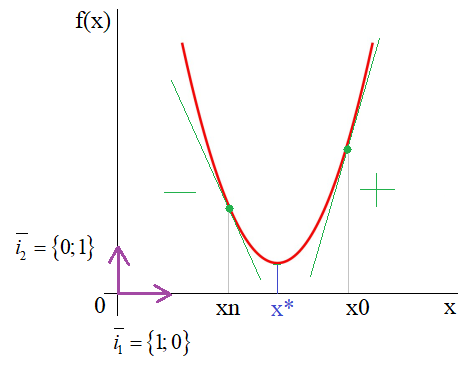

И градиент функции image.png можно записать как

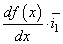

то есть, это будет уже направление вдоль оси ординат и направлен в сторону наибольшего увеличения функции. Соответственно, двигаясь в противоположную сторону, будем перемещаться к точке минимума x *.

Конечно, в результирующей формуле алгоритма поиска этот единичный вектор не пишется, а вместо него указывается разность по оси ординат, т.к. именно вдоль нее он и направлен:

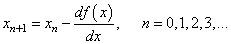

Однако у такой формулы есть один существенный недостаток: значение производной может быть очень большим и мы попросту «перескочим» через значение x* и уйдем далеко влево или вправо. Чтобы этого не происходило, производную дополнительно умножают на некоторое небольшое число λ:

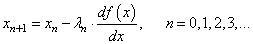

которое, в общем случае, также может меняться от итерации к итерации. Этот множитель получил название шаг сходимости.

Для примера, реализуем этот алгоритм на Python для случая одномерной параболы. Вначале подключим необходимые библиотеки и определим две функции: параболу

image.png

и ее производную:

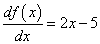


2.4711769623848285


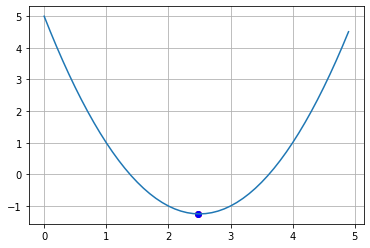

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*x - 5*x + 5

def df(x):
    return 2*x - 5

N = 20     # число итераций
xx = 0      # начальное значение
lmd = 0.9  # шаг сходимости

x_plt = np.arange(0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

plt.ion()   # включение интерактивного режима отображения графиков
fig, ax = plt.subplots()    # Создание окна и осей для графика
ax.grid(True)   # отображение сетки на графике

ax.plot(x_plt, f_plt)                   # отображение параболы
point = ax.scatter(xx, f(xx), c='red')  # отображение точки красным цветом

for i in range(N):
    xx = xx - lmd*df(xx)    # изменение аргумента на текущей итерации

    point.set_offsets([xx, f(xx)])  # отображение нового положения точки

    # перерисовка графика и задержка на 20 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.2)

plt.ioff()   # выключение интерактивного режима отображения графиков

print(xx)
ax.scatter(xx, f(xx), c='blue')
plt.show()

-2.094582726355172


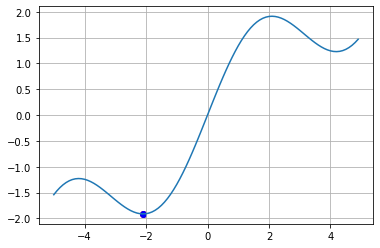

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)+0.5*x

def df(x):
    return np.cos(x) + 0.5

N = 20     # число итераций
xx = 0     # начальное значение
lmd = 0.9  # шаг сходимости

x_plt = np.arange(-5.0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

plt.ion()   # включение интерактивного режима отображения графиков
fig, ax = plt.subplots()    # Создание окна и осей для графика
ax.grid(True)   # отображение сетки на графике

ax.plot(x_plt, f_plt)                   # отображение параболы
point = ax.scatter(xx, f(xx), c='red')  # отображение точки красным цветом

mn = 100
for i in range(N):
    lmd = 1/min(i+1, mn)
    xx = xx - lmd*np.sign(df(xx))    # изменение аргумента на текущей итерации

    point.set_offsets([xx, f(xx)])  # отображение нового положения точки

    # перерисовка графика и задержка на 20 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)

plt.ioff()   # выключение интерактивного режима отображения графиков

print(xx)
ax.scatter(xx, f(xx), c='blue')
plt.show()

Простейшая НС – персептрон, представляет собой упрощенное отражение работы биологической сети, состоящей из нейронов, соединенных между собой дендридами и аксонами:

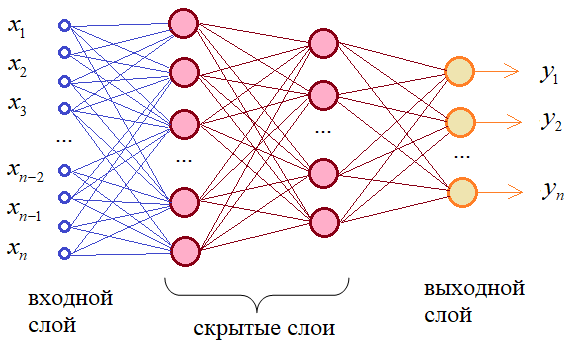

Это классический пример полносвязной сети прямого распространения. Здесь каждый нейрон предыдущего слоя связан с каждым нейроном следующего слоя. А сигнал распространяется от входного слоя к выходному, не образуя обратных связей.

Каждая связь между нейронами имеет определенный вес:

 image.png- от j-го нейрона к i-му нейрону

и, сигнал, проходя по ней, меняет свое значение в соответствии с этим весом:
image.png

Сам по себе нейрон – это сумматор входных сигналов, который, затем, пропускает сумму через функцию , называемую функцией активации. Выходное значение этой функции и есть выходное значение нейрона.

В концепции персептрона функции активации выбираются пороговыми:

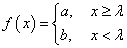

Например, такими:

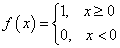   

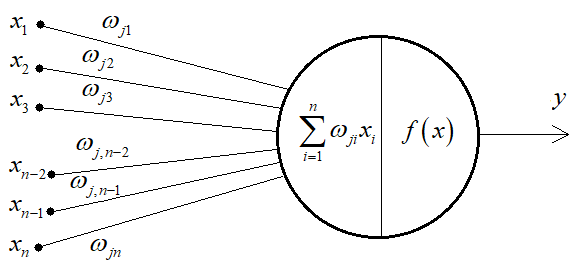

Чтобы лучше понять, как работает НС, рассмотрим очень простой и наглядный пример. Предположим, что некая девочка выбирает себе парня по трем параметрам:

есть ли у него квартира;

как относится к тяжелому року;

насколько красив.

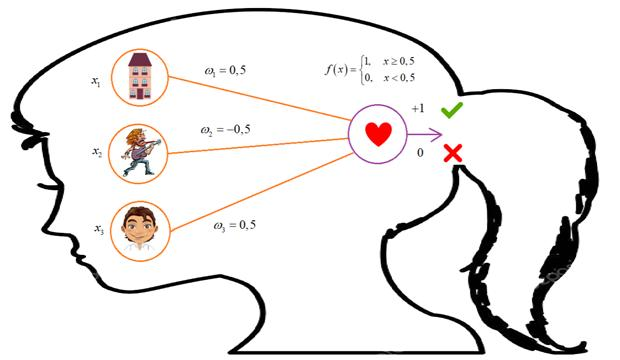

Причем, везде, «да» означает +1, а нет – 0. Наша девочка так воспитана, что положительно относится к наличию квартиры и красоте, и отрицательно к тяжелому року. Она больше любит лирическую музыку. Именно поэтому веса связей для дома и красивого парня – положительные, а для рока установлено отрицательное значение. В момент знакомства, на вход ее НС поступают сигналы  в виде значений +1 – для «да» и 0 – для «нет». Затем, каждое входное значение умножается на вес синаптической связи, по которой следует к выходному нейрону. На входе формируется суммарный сигнал в виде:

image.png

Далее, это значение проходит через функцию активации:

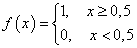

и на выходе нейрона формируется сигнал «да» или «нет».

Предположим, что ей встречается красивый парень с квартирой и обожающий тяжелый рок. Какая будет реакция? Умножаем все веса на 1, складываем, получаем сумму:

image.png

Это как раз граничное значение порога функции . Симпатия появилась, но тяжелый рок чуть все не испортил.

Давайте теперь посмотрим на реакцию встречи с симпатичным парнем, без квартиры и равнодушного к року. Получаем сумму:

image.png

Снова на грани была сформирована симпатия. А вот если бы симпатичный парень любил рок, то было бы значение:

image.png

И шансов познакомиться с нашей девочкой у него не было бы никаких. Конечно, максимальные шансы имеет симпатичный парень с квартирой и равнодушный к року. В этом случае сумма равна:

image.png

Уверенная симпатия. Вот общий принцип работы НС. Однако при такой простой структуре наша девочка не способна к сложным умозаключениям. Например, если она встречает парня с квартирой, обожающего рок, то ни за что не согласится с ним встречаться. Вне зависимости: красив он или нет. А вот если он красив, то готова пойти с ним на встречу, даже если он любит рок и не имеет квартиры. Такие более сложные выводы может позволить себе девочка с дополнительным слоем нейронов.

Здесь первый нейрон скрытого слоя будет активироваться всякий раз, когда встречается парень с квартирой и обожающий рок (красота в его работе не имеет значения – вес связи равен 0). А второй нейрон этого же слоя активируется при встрече с красивым парнем. При этом остальные два фактора не имеют значения. То есть, мы здесь получаем уже некоторое обобщение наблюдаемых факторов: красивый, остальное не важно и с квартирой, но слушающий рок. Результирующая симпатия теперь будет формироваться, если первое обобщение отсутствует, а второе – присутствует.

Например, встречается симпатичный молодой человек (второй нейрон загорается). Теперь важно, чтобы первый не включился. Для этого парень может любить рок, но не иметь квартиры (вероятно, она опасается, что при наличии постоянного жилья ей придется часто слышать ненавистный рок), или, иметь квартиру, но не любить рок. Или же, не иметь ни того, ни другого.
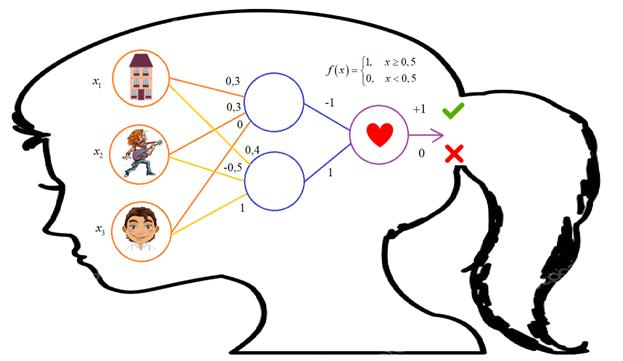


А вот если встречается по ее мнению не симпатичный парень, то второй нейрон уже не загорится и симпатия сформирована не будет, даже если у него есть квартира и он часами готов слушать лирическую музыку (значение суммы максимум будет равно 0,4 и пороговая функция выдаст 0). Для нашей девочки симпатия на первом месте!

Вот так, в самом простом случае работает НС прямого распространения.

Простейшая НС – персептрон, представляет собой упрощенное отражение работы биологической сети, состоящей из нейронов, соединенных между собой дендридами и аксонами:

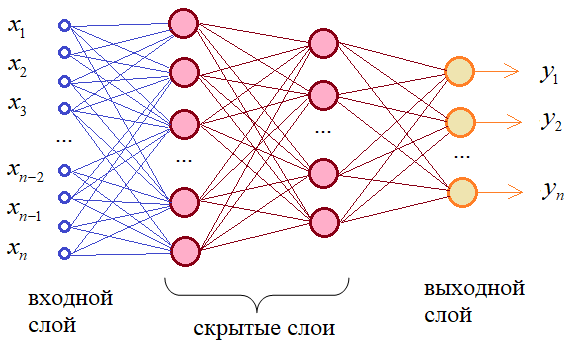

Это классический пример полносвязной сети прямого распространения. Здесь каждый нейрон предыдущего слоя связан с каждым нейроном следующего слоя. А сигнал распространяется от входного слоя к выходному, не образуя обратных связей.

Каждая связь между нейронами имеет определенный вес:

 image.png- от j-го нейрона к i-му нейрону

и, сигнал, проходя по ней, меняет свое значение в соответствии с этим весом:
image.png

Сам по себе нейрон – это сумматор входных сигналов, который, затем, пропускает сумму через функцию , называемую функцией активации. Выходное значение этой функции и есть выходное значение нейрона.

В концепции персептрона функции активации выбираются пороговыми:

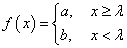

Например, такими:

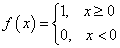   

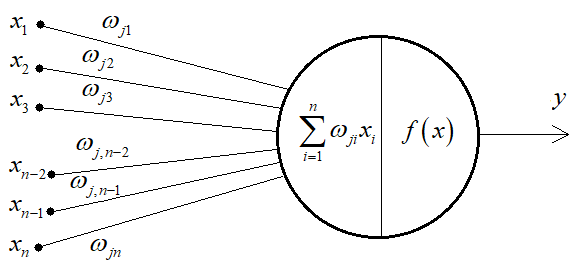

Чтобы лучше понять, как работает НС, рассмотрим очень простой и наглядный пример. Предположим, что некая девочка выбирает себе парня по трем параметрам:

есть ли у него квартира;

как относится к тяжелому року;

насколько красив.

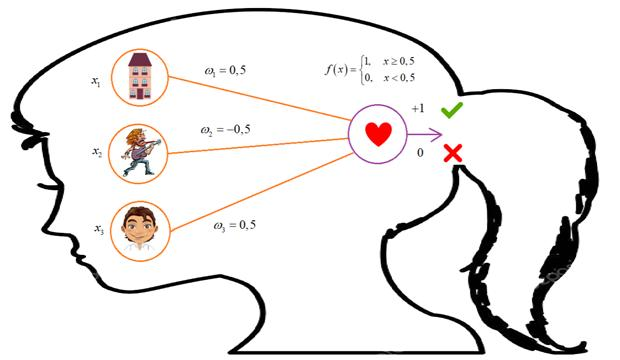

Причем, везде, «да» означает +1, а нет – 0. Наша девочка так воспитана, что положительно относится к наличию квартиры и красоте, и отрицательно к тяжелому року. Она больше любит лирическую музыку. Именно поэтому веса связей для дома и красивого парня – положительные, а для рока установлено отрицательное значение. В момент знакомства, на вход ее НС поступают сигналы  в виде значений +1 – для «да» и 0 – для «нет». Затем, каждое входное значение умножается на вес синаптической связи, по которой следует к выходному нейрону. На входе формируется суммарный сигнал в виде:

image.png

Далее, это значение проходит через функцию активации:

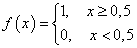

и на выходе нейрона формируется сигнал «да» или «нет».

Предположим, что ей встречается красивый парень с квартирой и обожающий тяжелый рок. Какая будет реакция? Умножаем все веса на 1, складываем, получаем сумму:

image.png

Это как раз граничное значение порога функции . Симпатия появилась, но тяжелый рок чуть все не испортил.

Давайте теперь посмотрим на реакцию встречи с симпатичным парнем, без квартиры и равнодушного к року. Получаем сумму:

image.png

Снова на грани была сформирована симпатия. А вот если бы симпатичный парень любил рок, то было бы значение:

image.png

И шансов познакомиться с нашей девочкой у него не было бы никаких. Конечно, максимальные шансы имеет симпатичный парень с квартирой и равнодушный к року. В этом случае сумма равна:

image.png

Уверенная симпатия. Вот общий принцип работы НС. Однако при такой простой структуре наша девочка не способна к сложным умозаключениям. Например, если она встречает парня с квартирой, обожающего рок, то ни за что не согласится с ним встречаться. Вне зависимости: красив он или нет. А вот если он красив, то готова пойти с ним на встречу, даже если он любит рок и не имеет квартиры. Такие более сложные выводы может позволить себе девочка с дополнительным слоем нейронов.

Здесь первый нейрон скрытого слоя будет активироваться всякий раз, когда встречается парень с квартирой и обожающий рок (красота в его работе не имеет значения – вес связи равен 0). А второй нейрон этого же слоя активируется при встрече с красивым парнем. При этом остальные два фактора не имеют значения. То есть, мы здесь получаем уже некоторое обобщение наблюдаемых факторов: красивый, остальное не важно и с квартирой, но слушающий рок. Результирующая симпатия теперь будет формироваться, если первое обобщение отсутствует, а второе – присутствует.

Например, встречается симпатичный молодой человек (второй нейрон загорается). Теперь важно, чтобы первый не включился. Для этого парень может любить рок, но не иметь квартиры (вероятно, она опасается, что при наличии постоянного жилья ей придется часто слышать ненавистный рок), или, иметь квартиру, но не любить рок. Или же, не иметь ни того, ни другого.
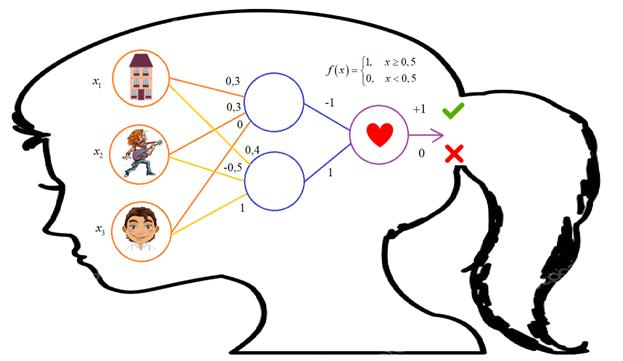


А вот если встречается по ее мнению не симпатичный парень, то второй нейрон уже не загорится и симпатия сформирована не будет, даже если у него есть квартира и он часами готов слушать лирическую музыку (значение суммы максимум будет равно 0,4 и пороговая функция выдаст 0). Для нашей девочки симпатия на первом месте!

Вот так, в самом простом случае работает НС прямого распространения.

In [1]:
import numpy as np
 
def act(x):
    return 0 if x < 0.5 else 1
 
def go(house, rock, attr):
    x = np.array([house, rock, attr])
    w11 = [0.3, 0.3, 0]
    w12 = [0.4, -0.5, 1]
    weight1 = np.array([w11, w12])  # матрица 2x3
    weight2 = np.array([-1, 1])     # вектор 1х2
 
    sum_hidden = np.dot(weight1, x)       # вычисляем сумму на входах нейронов скрытого слоя
    print("Значения сумм на нейронах скрытого слоя: "+str(sum_hidden))
 
    out_hidden = np.array([act(x) for x in sum_hidden])
    print("Значения на выходах нейронов скрытого слоя: "+str(out_hidden))
 
    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
    print("Выходное значение НС: "+str(y))
 
    return y
 
house = 1
rock = 0
attr = 1
 
res = go(house, rock, attr)
if res == 1:
    print("ОК")
else:
    print("NOT OK")

Значения сумм на нейронах скрытого слоя: [0.3 1.4]
Значения на выходах нейронов скрытого слоя: [0 1]
Выходное значение НС: 1
ОК


Выше показано как работает полносвязная НС со ступенчатой активационной функцией:

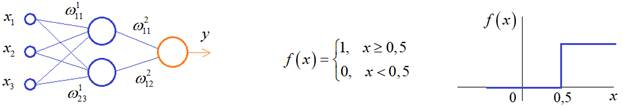

Такими были первые нейронные сети, предложенные Френком Розенблаттом в 1957 году. Давайте посмотрим, какие возможности дает нам такая нейросетевая архитектура. И для простоты рассмотрим простейший персептрон для задачи классификации двух классов образов, представленных двумя характеристиками: :

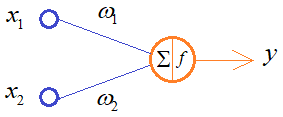

С активационной функцией:

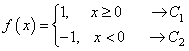

То есть, если значение суммы больше или равно 0, то вектор принадлежит классу 1:

image.png

иначе, классу 2:

image.png

Это может быть разделение на кошек и собак, на мужчин и женщин, на наличие сигнала и его отсутствие и т.п. Мы здесь обобщаем все эти случаи и представляем их в виде двух классов: .

Далее, из вида активационной функции видно, что граница разделения двух классов проходит на уровне 0. То есть, если:

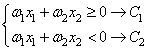

Значит, сумма:

image.png

определяет границу разделения одного класса образов от другого. Ее еще можно записать в виде:

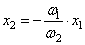

То есть, это прямая с угловым коэффициентом

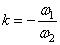

проходящая через начало системы координат:

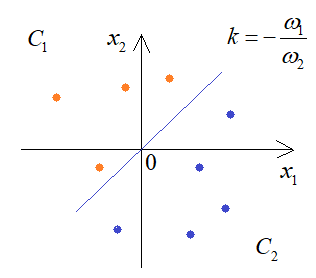

И все точки по одну сторону от этой прямой будут относиться к одному классу, а по другую сторону – к другому классу. Такая прямая получила название разделяющей прямой. (В многомерном случае она превращается в гиперплоскость и называется разделяющей гиперплоскостью). Этот двумерный график хорошо демонстрирует возможность правильной классификации простейшим персептроном только линейно-разделимых образов.

Чтобы все было понятнее, давайте в качестве примера смоделируем в Python два класса линейно-разделимых образов разделяющей прямой:

image.png

то есть, прямой, идущей под 45 градусов к осям координат. В этом случае, для корректной классификации, мы должны выбрать веса нейронной сети равными, но с противоположными знаками:

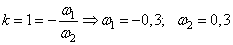

Можно выбрать и любые другие, например, -1 и 1 и т.п. И, как видим, наша НС успешно классифицирует эти образы. Но, если коэффициенты взять не равными, например:

image.png

то первый класс будет неверно распознаваться. Это, в частности, означает, что НС неверно настроена на классификацию таких образов и ее весовые коэффициенты нуждаются в корректировке.

Вернем все к рабочему состоянию с весами:

image.png

И предположим, что все наши образы сдвигаются вверх по оси :

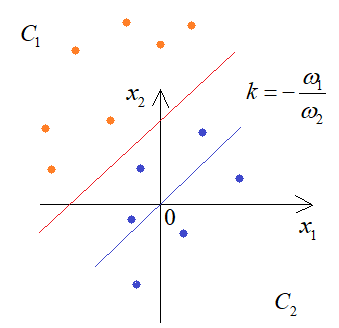

Теперь, наша разделяющая прямая не сможет верно классифицировать такие образы, т.к. она проходит через начало координат. И как бы мы ее ни крутили, корректного разделения не получится. Необходимо смещение. Поэтому, в НС дополнительно определяют еще один вход для смещения разделяющей гиперплоскости. В английской литературе он называется bias (перевести можно как порог).

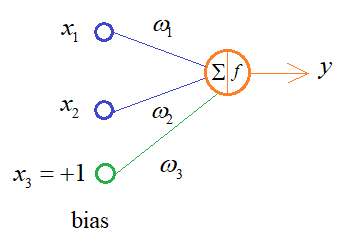

С этим дополнительным входом, наша прямая принимает вид:

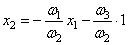

то есть, мы можем теперь сдвинуть ее на любое требуемое значение.

Давайте предположим, что все образы сдвинуты вверх по оси  на величину b. Тогда третий весовой коэффициент НС следует выбрать из уравнения:

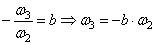

Определяем все это в нашей программе, добавляем к входному вектору третье значение +1 и теперь наша НС корректно классифицирует такие смещенные образы.

Это смещение используется во всех современных сетях, а не только в персептроне. Здесь я лишь показал пример необходимости его использования. Но та же самая картина сохраняется и для других видов НС с большими размерностями.

Задача XOR
Рассмотренная нами НС с одним нейроном, может классифицировать только линейно-разделимые образы. Однако, на практике чаще встречаются более сложные задачи. Например, представим, что классы наших образов распределены следующим образом:

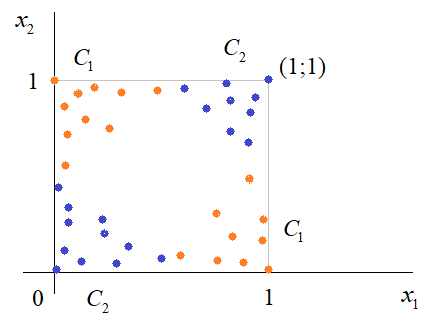

Здесь невозможно провести одну линию для их правильной классификации. Как тогда быть? Например, провести две линии, вот так:

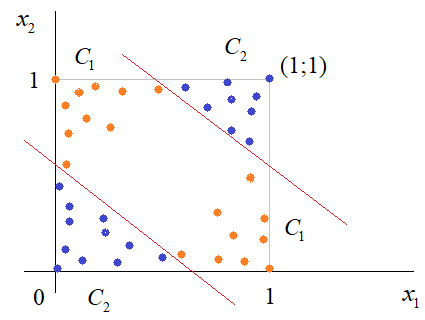

И все, что будет попадать между ними – отнесем к первому классу, а за их пределами – ко второму классу. Что это за НС, которая способна на такие операции? В действительности, все просто: каждая разделительная линия может быть представлена отдельным нейроном, а затем, результат их классификации объединяется результирующим нейроном выходного слоя:

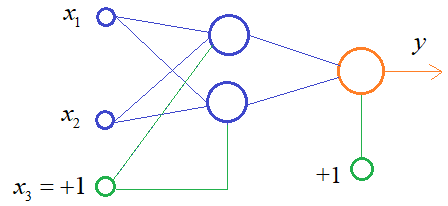

Давайте, для простоты, будем полагать, что на входы подаются только значения 0 или 1:

image.png

Тогда, все наши образы будут лежать в углах квадрата:

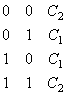

Смотрите, если image.png, то получаем таблицу истинности для битовой операции XOR (исключающее ИЛИ). Поэтому в литературе задача разделения таких образов получила название задачи XOR.

Далее, активационная функция каждого нейрона будет иметь вид:

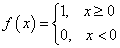

Осталось определить веса связей НС для решения поставленной задачи классификации. Для начала, положим, что первый нейрон скрытого слоя будет формировать границу:

image.png

Учитывая, нашу формулу:

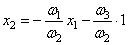

Веса входов первого нейрона для  можно взять равными:

image.png

а вес третьей связи:

image.png

Все, получили прямую, которая формирует следующее разделение на плоскости:

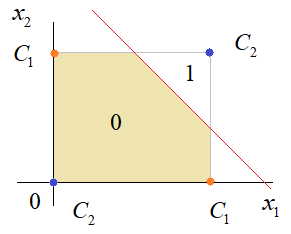

Второй нейрон скрытого слоя будет формировать разделения прямой:

image.png

и веса его связей можно взять равными:

 image.png  и    
image.png

Получаем следующую картину:

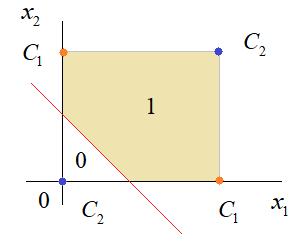

Теперь, нам нужно объединить результаты их работы, чтобы получилась следующая разделяющая область:

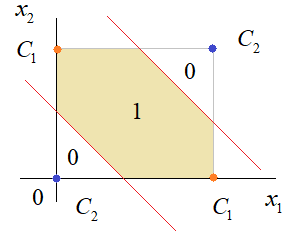

Как это сделать? То есть, как выбрать веса для выходного нейрона, чтобы получить такую картину классификации? Если результаты просто сложить, то получим разделение вида и на выходе активационной функции увидим одну большую область с 1 и одну область с 0.

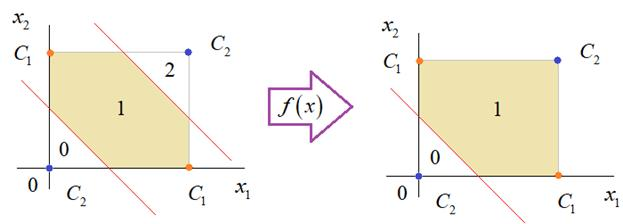

Это не самый лучший вариант выбора результата выходного нейрона. Лучше из второго вычесть первое:

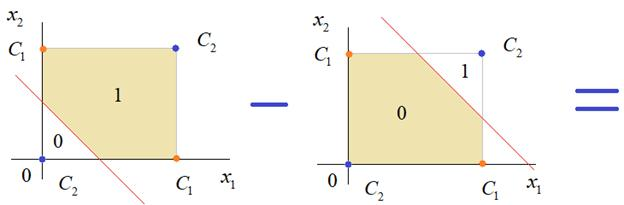

И на входе выходного нейрона будем получать значения:

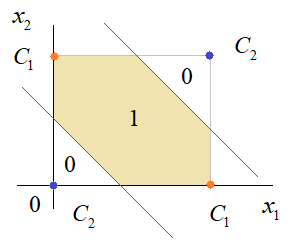

Для надежности сместим эти значения на -0,5 и окончательно получим результат:

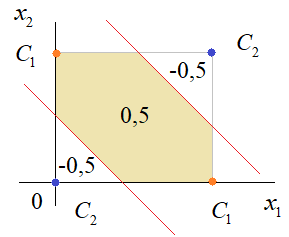

То есть, веса в нашей НС, будут следующими:

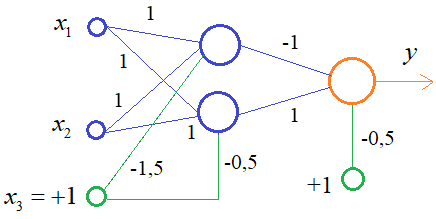

Класс C2
Класс C2
Класс C2
Класс C2
Класс C2


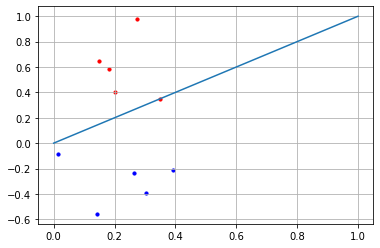

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1, x2]

f = [0, 1]

w = np.array([-0.3, 0.3])
for i in range(N):
    x = np.array([C2[0][i], C2[1][i]])
    y = np.dot(w, x)
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

Класс C1
Класс C1
Класс C1
Класс C1
Класс C1


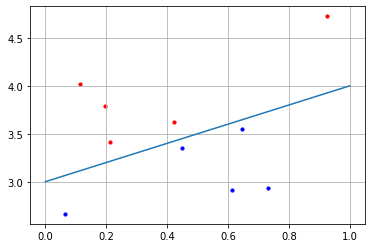

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
b = 3

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)] + b
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1 + b
C2 = [x1, x2]

f = [0+b, 1+b]

w2 = 0.5
w3 = -b*w2
w = np.array([-w2, w2, w3])
for i in range(N):
    x = np.array([C1[0][i], C1[1][i], 1])
    y = np.dot(w, x)
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

In [5]:
import matplotlib .pyplot as plt
import numpy as np

def act(x):
    return 0 if x <= 0 else 1


def go(C):
    x = np.array([C[0], C[1], 1])
    w1 = [1, 1, -1.5]
    w2 = [1, 1, -0.5]
    w_hidden = np.array([w1, w2])
    w_out = np.array([-1, 1, -0.5])

    sum = np.dot(w_hidden, x)  # вычисляем сумму на входах нейронов скрытого слоя

    out = [act(x) for x in sum]
    out.append(1)
    out = np.array(out)

    sum = np.dot(w_out, out)
    y = act(sum)
    return y

C1 = [[1, 0], [0, 1]]
C2 = [[0, 0], [1, 1]]

print(go(C1[0]), go(C1[1]))
print(go(C2[0]), go(C2[1]))

1 1
0 0


# Функции активации

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return x  *  (x  >  0)


def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

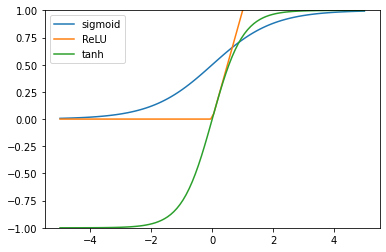

In [8]:
x = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')
ax.set_ylim(-1, 1)
ax.legend()

# Инициализация весов

In [9]:
import numpy as np
import random

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1
print(synaptic_weights)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [10]:
# можем дополнительно посмотреть процесс формирования весов
np.random.seed(1)

step1 = np.random.random((3, 1))
print(step1, end='\n\n')

step2 = 2 * step1
print(step2, end='\n\n')

step3 = step2 - 1
print(step3)


[[4.17022005e-01]
 [7.20324493e-01]
 [1.14374817e-04]]

[[8.34044009e-01]
 [1.44064899e+00]
 [2.28749635e-04]]

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


# Простая нейронная сеть

Данные 1| 0 0 1 0

Данные 2| 1 1 1 1

Данные 3| 1 0 1 1

Данные 4| 0 1 0 0

In [11]:
'''
Пример простой нейронной сети на numpy
'''

import numpy as np

# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1


# вычисление сигмоид функции
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
    return x * (1 - x)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output
    
# тренировка нейронной сети
def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights
    for iteration in range(training_iterations):
        # перекачивание данных через нейрон
        output = run_nn(training_inputs)

        # вычисление ошибки через обратное распространение MSE
        error = training_outputs - output
            
        # выполнение корректировки весов
        adjustments = np.dot(training_inputs.T, error * sigm_deriv(output))

        synaptic_weights += adjustments

# создание данных для обучения
training_inputs = np.array([[0,0,1], [1,1,1], [1,0,1], [0,1,1]])
training_outputs = np.array([[0,1,1,0]]).T

# запуск тренировки нейронной сети 
train_nn(training_inputs, training_outputs, 15000)
print("веса после завершения обучения: ")
print(synaptic_weights)

веса после завершения обучения: 
[[10.08740896]
 [-0.20695366]
 [-4.83757835]]


In [14]:
1# получение трех чисел от пользователя
user_inp1 = str(input("Первое число(0 или 1): "))
user_inp2 = str(input("Второе число(0 или 1): "))
user_inp3 = str(input("Третье число(0 или 1): "))

print("Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([user_inp1, user_inp2, user_inp3])))

Первое число(0 или 1): 0
Второе число(0 или 1): 0
Третье число(0 или 1): 0
Проверка на новых данных: {user_inp1} {user_inp2} {user_inp3}
Предсказание нейронной сети: 
[0.5]


# Данные

In [15]:
from sklearn import datasets


In [16]:
import pandas as pd

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Программное обеспечение интеллектуальных систем/lection_1. История НС. Персептрон/Iris.csv')

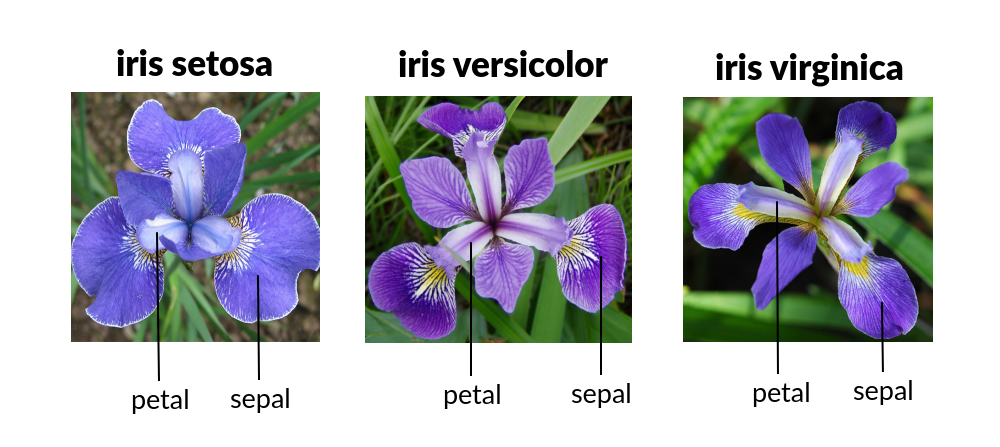

чашелистик и лепесток

In [19]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()

In [21]:
data.shape

(150, 4)

In [22]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Двуслойная нейронная сеть

In [23]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [24]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

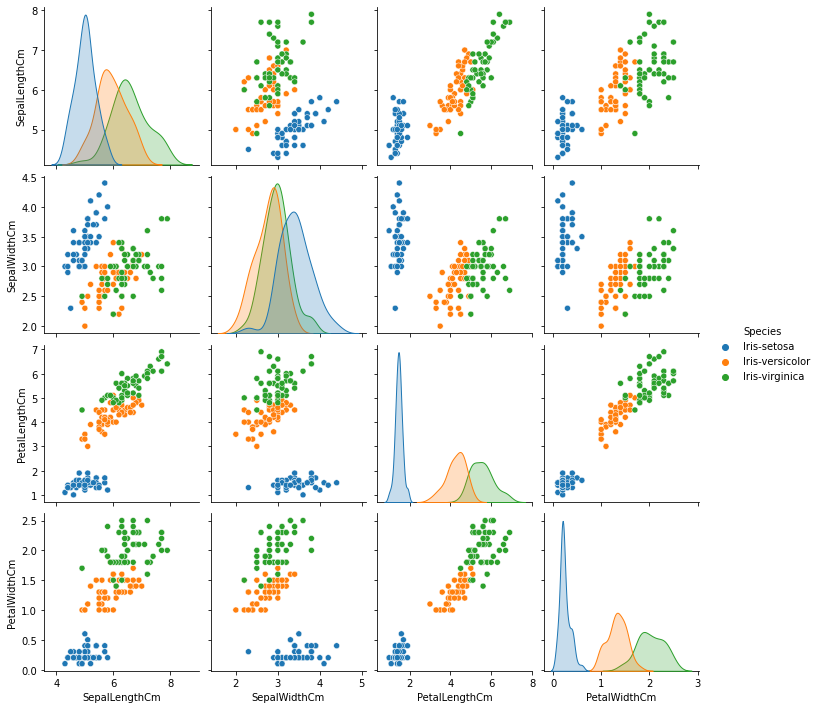

In [25]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Программное обеспечение интеллектуальных систем/lection_1. История НС. Персептрон/Iris.csv')

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
   

In [26]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [27]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 99.06%


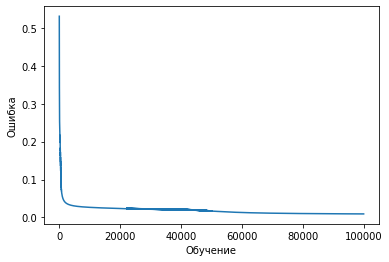

In [28]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [29]:
errors[-1]

0.009399388170651607

In [30]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [31]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

In [32]:
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [33]:
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

[[[31  0]
  [ 0 19]]

 [[34  0]
  [ 0 16]]

 [[35  0]
  [ 0 15]]]
